In [161]:
%matplotlib inline
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [162]:
musicdf = pd.read_csv('./musicdf.csv', index_col=0, encoding='latin-1')

In [163]:
musicdf['zero_crossing_rate'] = musicdf['zero_crossings']/musicdf['duration']

In [22]:
#Not using the Tempo labels. I am not sure if it adds any value
#musicdf = pd.concat([musicdf, pd.get_dummies(musicdf['tempo'],  drop_first=True)], axis=1)

In [164]:
feature_cols = musicdf.columns.drop(['composer', 'description', 'symphony', 'file', 'part', 'tempo', 'zero_crossings', 'duration'])

In [165]:
df = musicdf[feature_cols]

In [166]:
df.shape

(61, 16)

In [168]:
# Scale the features (using the scale function) from -1 to 1.
## https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
df.is_copy = False
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
df[feature_cols] = min_max_scaler.fit_transform(df)

In [169]:
df.head()

bpm  spectral_centroid_avg  spectral_bw_avg  Chroma_A  Chroma_A#  \
0 -0.223397               0.153321        -0.078189  1.000000   0.369589   
1 -0.223397              -0.226138        -0.435325  0.142223  -0.002802   
2 -0.280992               0.532922         0.380873 -1.000000  -0.095284   
3 -0.388669               0.198737        -0.405426 -0.415656  -0.081891   
4 -0.223397              -0.091472        -0.618977  0.455248   1.000000   

   Chroma_B  Chroma_C  Chroma_C#  Chroma_D  Chroma_D#  Chroma_E  Chroma_F  \
0 -0.561368 -0.552708  -0.340893 -0.741519  -0.010993  0.386048  0.026002   
1 -0.386637 -0.477899   0.145640  0.053555  -0.089265 -0.783091 -0.180935   
2  0.961898  0.401980  -0.569289 -0.483097   0.303182 -0.190502 -0.102044   
3 -0.094287 -0.468957   0.176289  0.629075   0.696995 -0.934946 -0.689849   
4  0.473796 -0.973643  -0.832479 -0.096650   0.804092 -0.255209 -0.436058   

   Chroma_F#  Chroma_G  Chroma_G#  zero_crossing_rate  
0  -1.000000 -1.000000  -0.012968           -0.060113  
1   0.520284 -0.288348  -0.290921           -0.505084  
2   0.645635 -0.253470  -1.000000            0.340167  
3   0.064887 -0.323380  -0.652499           -0.074220  
4  -0.221500 -0.320191  -0.425967           -0.276382

In [170]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(df)[:,0]
Y = pca.fit_transform(df)[:,1]

In [171]:
df['x'] = X
df['y'] = Y

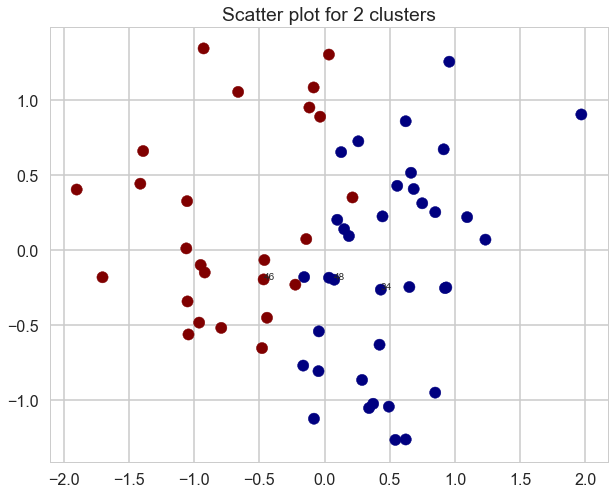

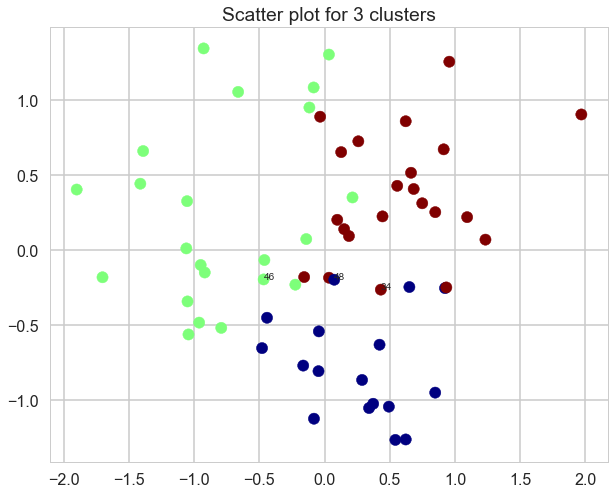

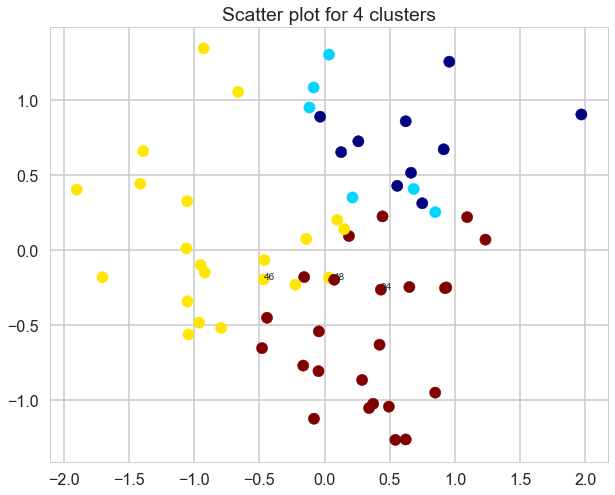

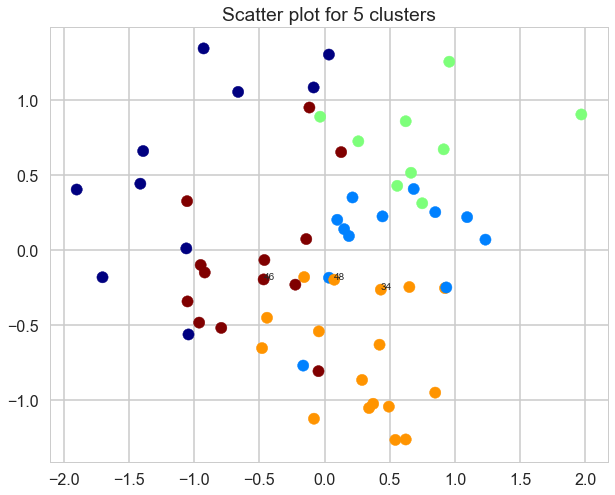

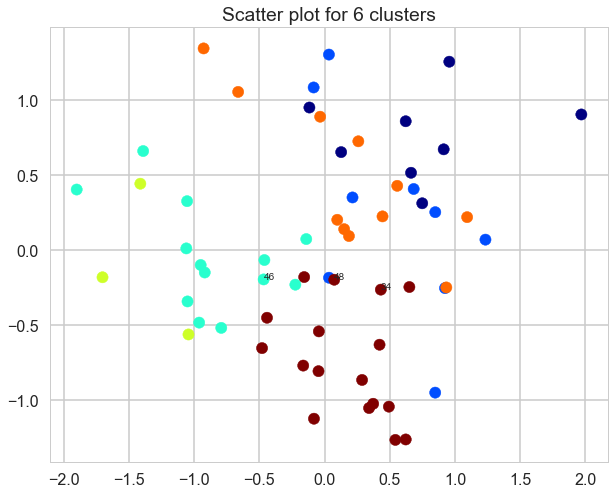

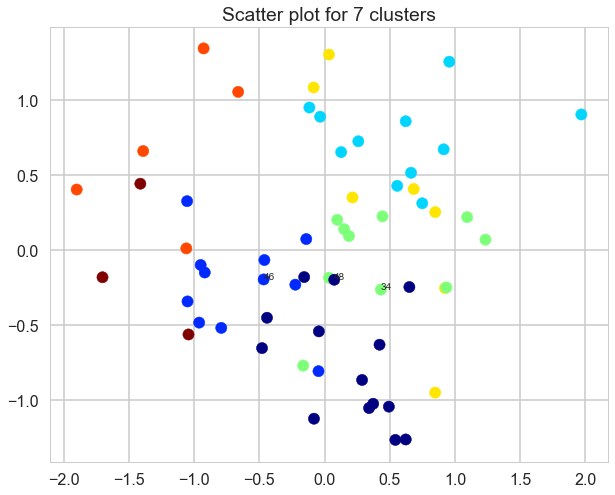

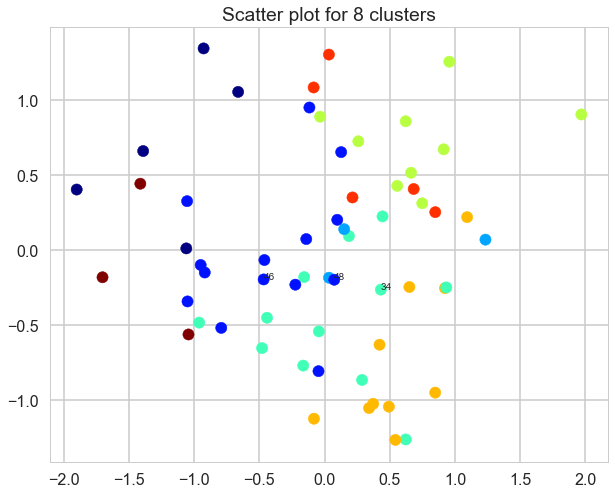

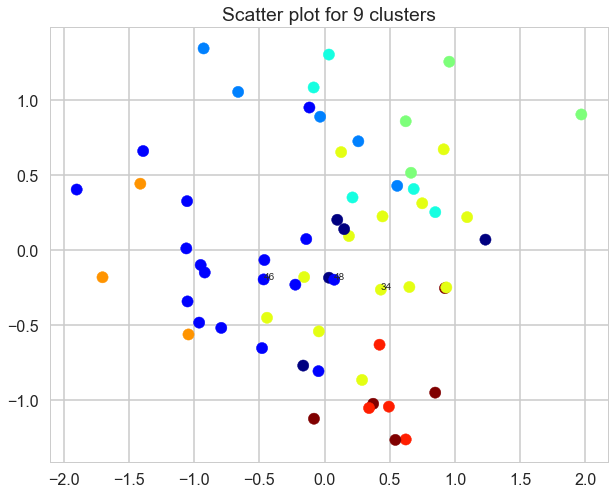

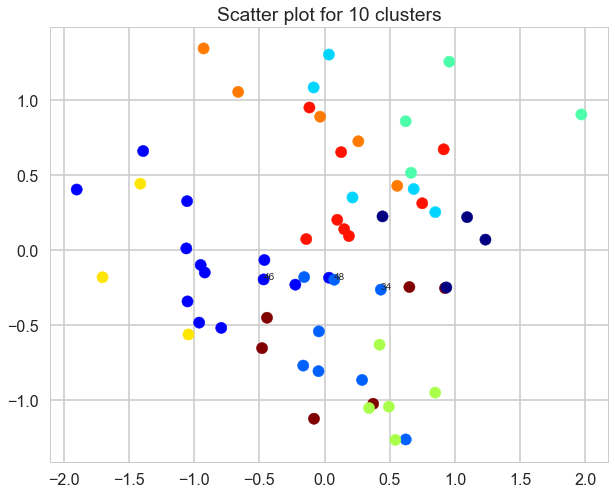

In [172]:
%matplotlib inline
k_range = range(2,11)
for n_clusters in k_range:
    kmeanscluster = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    df['cluster'] = kmeanscluster.fit_predict(df[feature_cols])
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    fig.set_size_inches(10, 8)
    ax1.scatter(df['x'],df['y'],c=df['cluster'], cmap='jet')
    ax1.set_title("Scatter plot for %d clusters"%n_clusters)
    for i in [48,46,34]:
        ax1.annotate(i, (df['x'][i],df['y'][i]))
    plt.show()
    del df['cluster']

With three clusters there is minimum overalap and we get distinct groups of data points. Hence chosing 3 as the final number of clusters.

In [173]:
kmeanscluster = sklearn.cluster.KMeans(n_clusters=3, random_state=10)
df['cluster'] = kmeanscluster.fit_predict(df[feature_cols])

In [174]:
kmeanscluster.cluster_centers_

array([[ 0.00283364,  0.3926976 , -0.38150516, -0.27114502, -0.13793142,
         0.28211485,  0.36812155, -0.33081319, -0.5457139 ,  0.0819626 ,
         0.05588555,  0.27288971,  0.54666414, -0.0799126 , -0.22927162,
         0.30276617],
       [-0.01061333,  0.01713186, -0.57303471,  0.33898204,  0.36479344,
        -0.03964969, -0.40785928, -0.44792033, -0.27635477,  0.28508994,
        -0.27563853, -0.13589486,  0.16410715, -0.24822443, -0.13430073,
        -0.05755805],
       [-0.2288142 ,  0.02760028, -0.32964673, -0.15720631, -0.4338235 ,
        -0.26324825,  0.14656273, -0.16262693, -0.38258748, -0.07801293,
        -0.4582834 , -0.11835298,  0.55496988,  0.21116011,  0.31671756,
        -0.10916465]])

In [175]:
kmeanscluster.labels_

array([1, 1, 0, 1, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2,
       1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 0])

In [176]:
df = pd.concat([df, pd.DataFrame(kmeanscluster.fit_transform(df[feature_cols]).tolist(),  columns=['cluster_x','cluster_y', 'cluster_z'])], axis=1)

In [177]:
df.head()

bpm  spectral_centroid_avg  spectral_bw_avg  Chroma_A  Chroma_A#  \
0 -0.223397               0.153321        -0.078189  1.000000   0.369589   
1 -0.223397              -0.226138        -0.435325  0.142223  -0.002802   
2 -0.280992               0.532922         0.380873 -1.000000  -0.095284   
3 -0.388669               0.198737        -0.405426 -0.415656  -0.081891   
4 -0.223397              -0.091472        -0.618977  0.455248   1.000000   

   Chroma_B  Chroma_C  Chroma_C#  Chroma_D  Chroma_D#    ...      Chroma_F#  \
0 -0.561368 -0.552708  -0.340893 -0.741519  -0.010993    ...      -1.000000   
1 -0.386637 -0.477899   0.145640  0.053555  -0.089265    ...       0.520284   
2  0.961898  0.401980  -0.569289 -0.483097   0.303182    ...       0.645635   
3 -0.094287 -0.468957   0.176289  0.629075   0.696995    ...       0.064887   
4  0.473796 -0.973643  -0.832479 -0.096650   0.804092    ...      -0.221500   

   Chroma_G  Chroma_G#  zero_crossing_rate         x         y  cluster  \
0 -1.000000  -0.012968           -0.060113 -1.412969  0.443058        1   
1 -0.288348  -0.290921           -0.505084 -0.116491  0.951255        1   
2 -0.253470  -1.000000            0.340167  0.372533 -1.024819        0   
3 -0.323380  -0.652499           -0.074220 -0.083972  1.085036        1   
4 -0.320191  -0.425967           -0.276382 -1.900959  0.404214        1   

   cluster_x  cluster_y  cluster_z  
0   2.695830   1.937373   2.745231  
1   2.003747   1.279328   1.388408  
2   1.619905   2.473515   2.388838  
3   2.365303   1.839751   2.101891  
4   2.568598   1.373611   2.691188  

[5 rows x 22 columns]

In [178]:
## Tried the Affinity propogation method but then decided not to use the eight clusters suggested by it.
#model = sklearn.cluster.AffinityPropagation()
#labels = model.fit_predict(df[feature_cols])
#print labels

In [179]:
from scipy.spatial import distance
def distanceFromClusterCenter(row):
    return distance.euclidean((row['cluster_x'], row['cluster_y'], row['cluster_z']),[0,0,0])

In [180]:
df['cluster_dist'] = df.apply(distanceFromClusterCenter, axis=1)

In [181]:
df.groupby(['cluster']).agg({"cluster_dist": [min, max]})

cluster_dist          
                 min       max
cluster                       
0           2.040319  3.801173
1           1.855775  4.783243
2           2.018081  4.866946

In [187]:
df.loc[df.groupby('cluster').cluster_dist.idxmin()]

bpm  spectral_centroid_avg  spectral_bw_avg  Chroma_A  Chroma_A#  \
48 -0.033333               0.294238         0.054267  0.234072   0.015135   
46  0.036519               0.129196        -0.665219  0.314972   0.262153   
34 -0.223397               0.077288        -0.572336 -0.162122  -0.381299   

    Chroma_B  Chroma_C  Chroma_C#  Chroma_D  Chroma_D#      ...       \
48 -0.055667  0.172387  -0.192474 -0.425852  -0.282212      ...        
46 -0.038336 -0.228854  -0.474748 -0.483970   0.066669      ...        
34  0.074262  0.455503  -0.241546 -0.755220  -0.110272      ...        

    Chroma_G  Chroma_G#  zero_crossing_rate         x         y  cluster  \
48 -0.202717  -0.127400           -0.054573  0.073987 -0.197480        0   
46 -0.115249  -0.097053           -0.005204 -0.467421 -0.195447        1   
34  0.199261   0.240700           -0.066870  0.431374 -0.263476        2   

    cluster_x  cluster_y  cluster_z  cluster_dist  
48   1.026303   1.274439   1.218774      2.040319  
46   1.144177   0.673012   1.296848      1.855775  
34   0.949304   1.595149   0.791815      2.018081  

[3 rows x 23 columns]

In [194]:
musicdf.iloc[[34,46,48]]

composer                       description  \
34  beethoven  Beethoven  Ludwig van(1770-1827)   
46  beethoven  Beethoven  Ludwig van(1770-1827)   
48    borodin     Borodin  Alexander(1833-1887)   

                                          symphony  \
34     Sonata No. 23 F minor(Appassionata) Opus 57   
46  Sonata No. 29 Bb major(Hammerklavier) Opus 106   
48                                    Petite Suite   

                             file         part              tempo         bpm  \
34                   appass_1.mp3  1. Movement      Allegro assai  120.185320   
46  beethoven_hammerklavier_4.mp3  4. Movement    Largo - Allegro  132.512019   
48                    bor_ps2.mp3   Intermezzo  Tempo di minuetto  129.199219   

      duration  zero_crossings  spectral_centroid_avg         ...          \
34  562.546939          588102             605.638087         ...           
46  645.642449          692146             616.518193         ...           
48  165.537959          173936             651.111392         ...           

    Chroma_C  Chroma_C#  Chroma_D  Chroma_D#  Chroma_E  Chroma_F  Chroma_F#  \
34  0.289746   0.226002  0.165950   0.225470  0.273041  0.249360   0.239691   
46  0.204331   0.184748  0.214033   0.248930  0.261582  0.261247   0.254856   
48  0.254411   0.234683  0.224335   0.202674  0.268717  0.284229   0.221961   

    Chroma_G  Chroma_G#  zero_crossing_rate  
34  0.288916   0.283040         1045.427429  
46  0.235946   0.239407         1072.026787  
48  0.221214   0.235487         1050.731813  

[3 rows x 24 columns]

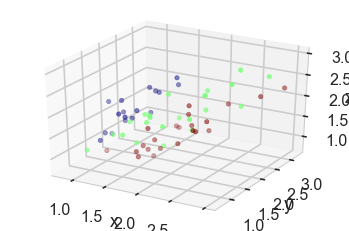

In [185]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df.cluster_x, df.cluster_y, df.cluster_z,c=df['cluster'], cmap='jet')
threedee.set_xlabel('x')
threedee.set_ylabel('y')
threedee.set_zlabel('z')
plt.show()